<a href="https://colab.research.google.com/github/nkurinsky/THz-FTS/blob/master/python/Notebooks/FTSmodel_BlackbodySpectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pylab import *
from scipy import fft
import matplotlib.pyplot as plt
from scipy.signal import periodogram as psd
import numpy as np
from scipy.signal import find_peaks
from math import sqrt, sin
from cmath import pi
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/BREAD Experiment/FTS Modeling/lib/')
from BlackbodyFunctions import *
from FTSFunctions import *

Motorized stage details (https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=2163): 


*   Max Velocity = 2.6 mm/s
*   Max Travel Range = 12mm (12e3 µm)
*   Minimum Step Size = 0.10 µm

Review this document for understanding of how FTS works/ data looks: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Spectroscopy/Fundamentals_of_Spectroscopy/The_Power_of_the_Fourier_Transform_for_Spectroscopists

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

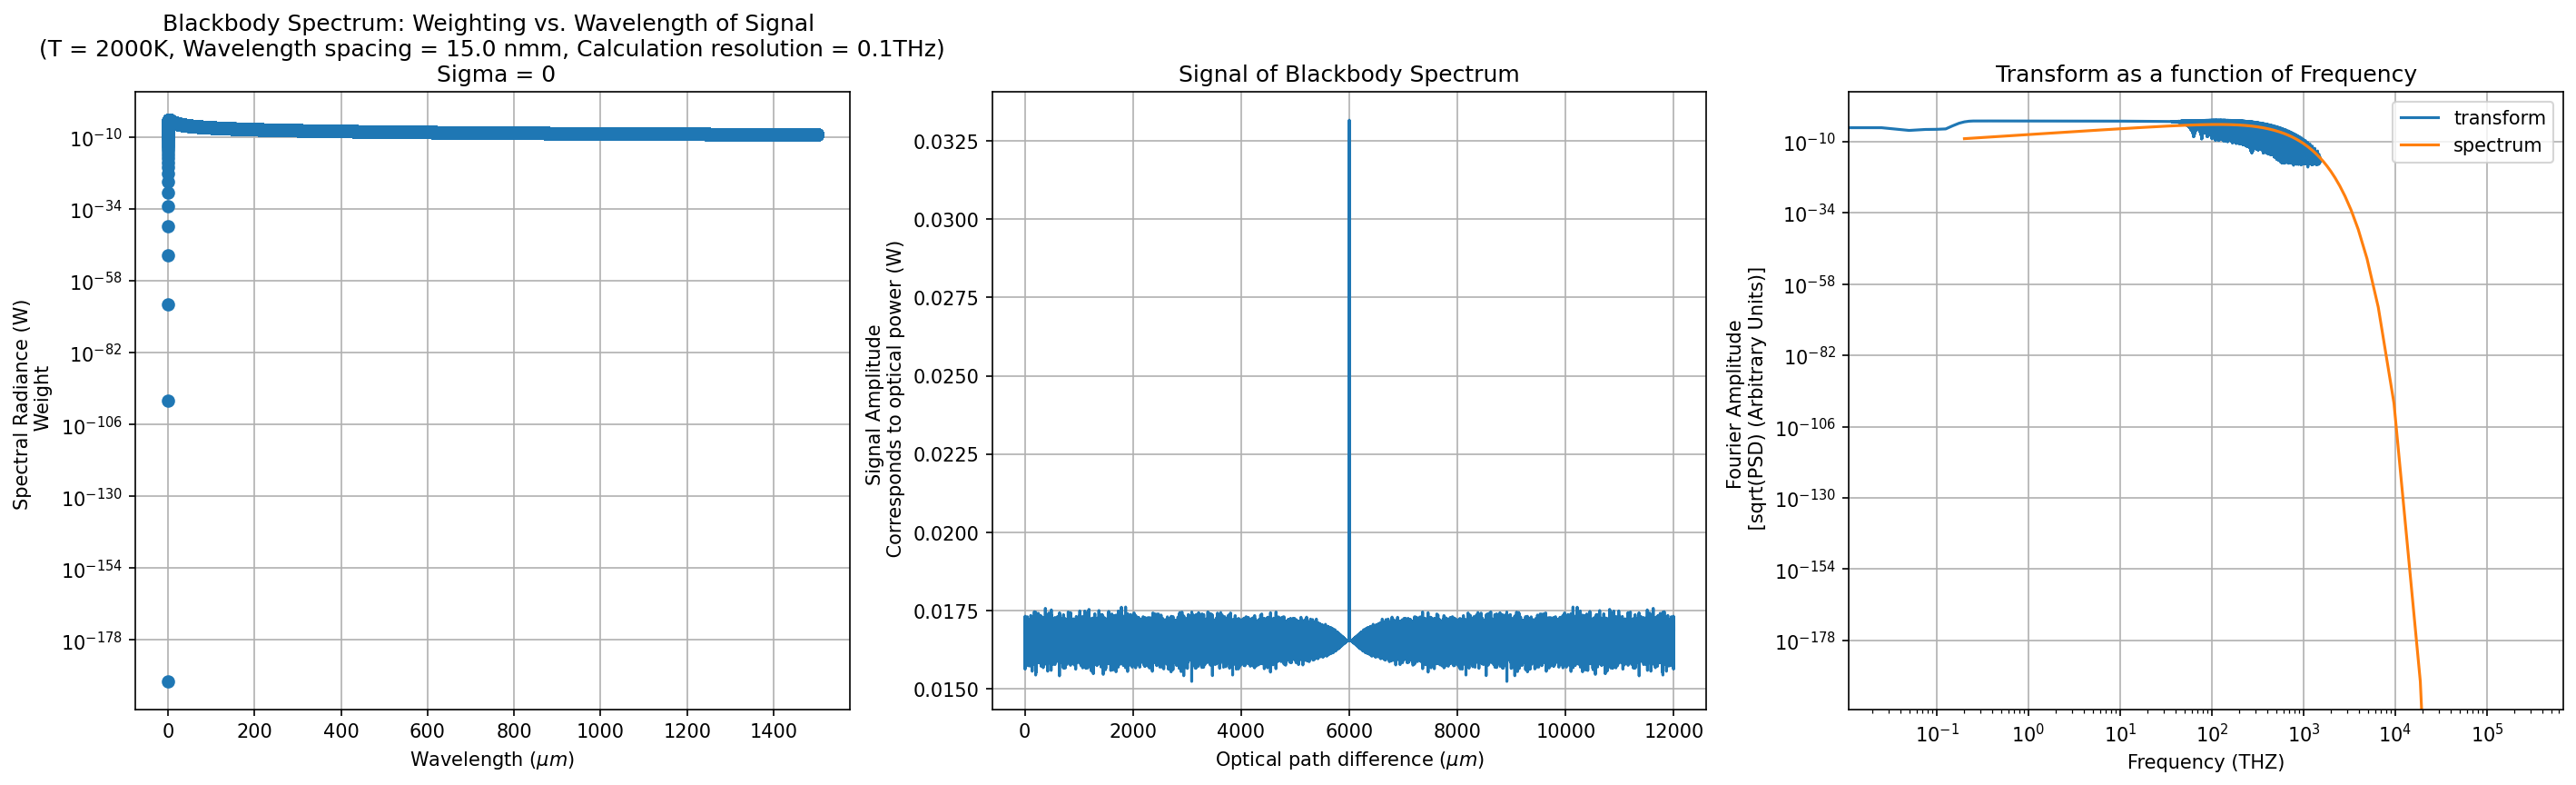

In [0]:
adjustment = False 
lambda_or_nu = True

#for blackbody spectrum, decide wavelength range and number of wavelength slices (should correspond to the number of peaks in that window after transform)
min_wavelength = 0.001 #micron
max_wavelength = 1500.0 #micron
num_slices = 1e5 #1e6
wavelength_slice_size = (max_wavelength - min_wavelength)/num_slices #micron
wavelengths = arange(min_wavelength, max_wavelength, wavelength_slice_size)
sigma = 0

c_micron_per_second = 3e8 * 1e6
Hz_to_THz = 1e-12
freq_slice_size = 0.1 #THz

x, y, weights_nofilter = blackbody_input_function(lambda_or_nu, wavelengths, freq_slice_size, filter='no', sigma =sigma)

fig = plt.figure(figsize=(23, 6), dpi=150)  
plt.subplot(1, 3, 1)
plt.plot(wavelengths, weights_nofilter , 'o')

plt.subplot(1, 3, 2)
plt.plot(x, y)

plt.subplot(1, 3, 3)
frequency, spectrum_nofilter = psd_frequency(y,'parzen')
plt.semilogy(frequency, spectrum_nofilter, label='transform')

#plot details for blackbody spectrum plot
plt.subplot(1, 3, 1)
plt.grid(True)
plt.yscale('log')
title = "Blackbody Spectrum: Weighting vs. Wavelength of Signal \n (T = " + str(Temp) + "K, Wavelength spacing = "+ str(round(wavelength_slice_size*1000,2)) + " nmm, Calculation resolution = " + str(round(freq_slice_size, 2)) + "THz) \n Sigma = " + str(sigma)
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(1, 3, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(1, 3, 3)
plt.title("Transform as a function of Frequency")
plt.semilogy(c_micron_per_second*Hz_to_THz/wavelengths, weights_nofilter, label = 'spectrum')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequency (THZ)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")
plt.legend()
plt.show()

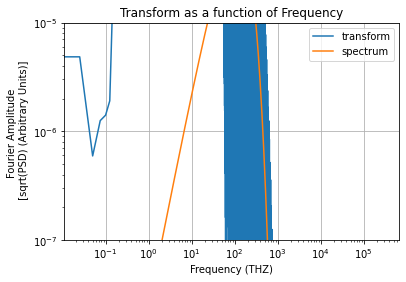

In [0]:
plt.title("Transform as a function of Frequency")
plt.semilogy(frequency, spectrum_nofilter, label='transform') 
plt.semilogy(c_micron_per_second*Hz_to_THz/wavelengths, weights_nofilter, label = 'spectrum')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequency (THZ)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")
plt.legend()
plt.ylim(1e-7,1e-5)
plt.show()


The reason I made this plot above is to show the discrepancy between the transform and the input spectrum. The transform seems to have values ~33 times (1/0.03) larger than the input spectrum. This behavior has been seen also in our functions which are dependednt on only the frequency 

## Adding the Si Filter:

Gentec Electro-Optics silicon window 1.1 – 9 ; 50 – 1000μm 

[3.66115670e-06 3.35793890e-06 7.10329836e-07 ... 3.71057266e-17
 1.23831537e-16 1.03802019e-16]
[5.36884141e-06 4.83924670e-06 5.93240449e-07 ... 4.45738403e-16
 5.41616556e-16 3.83962603e-16]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

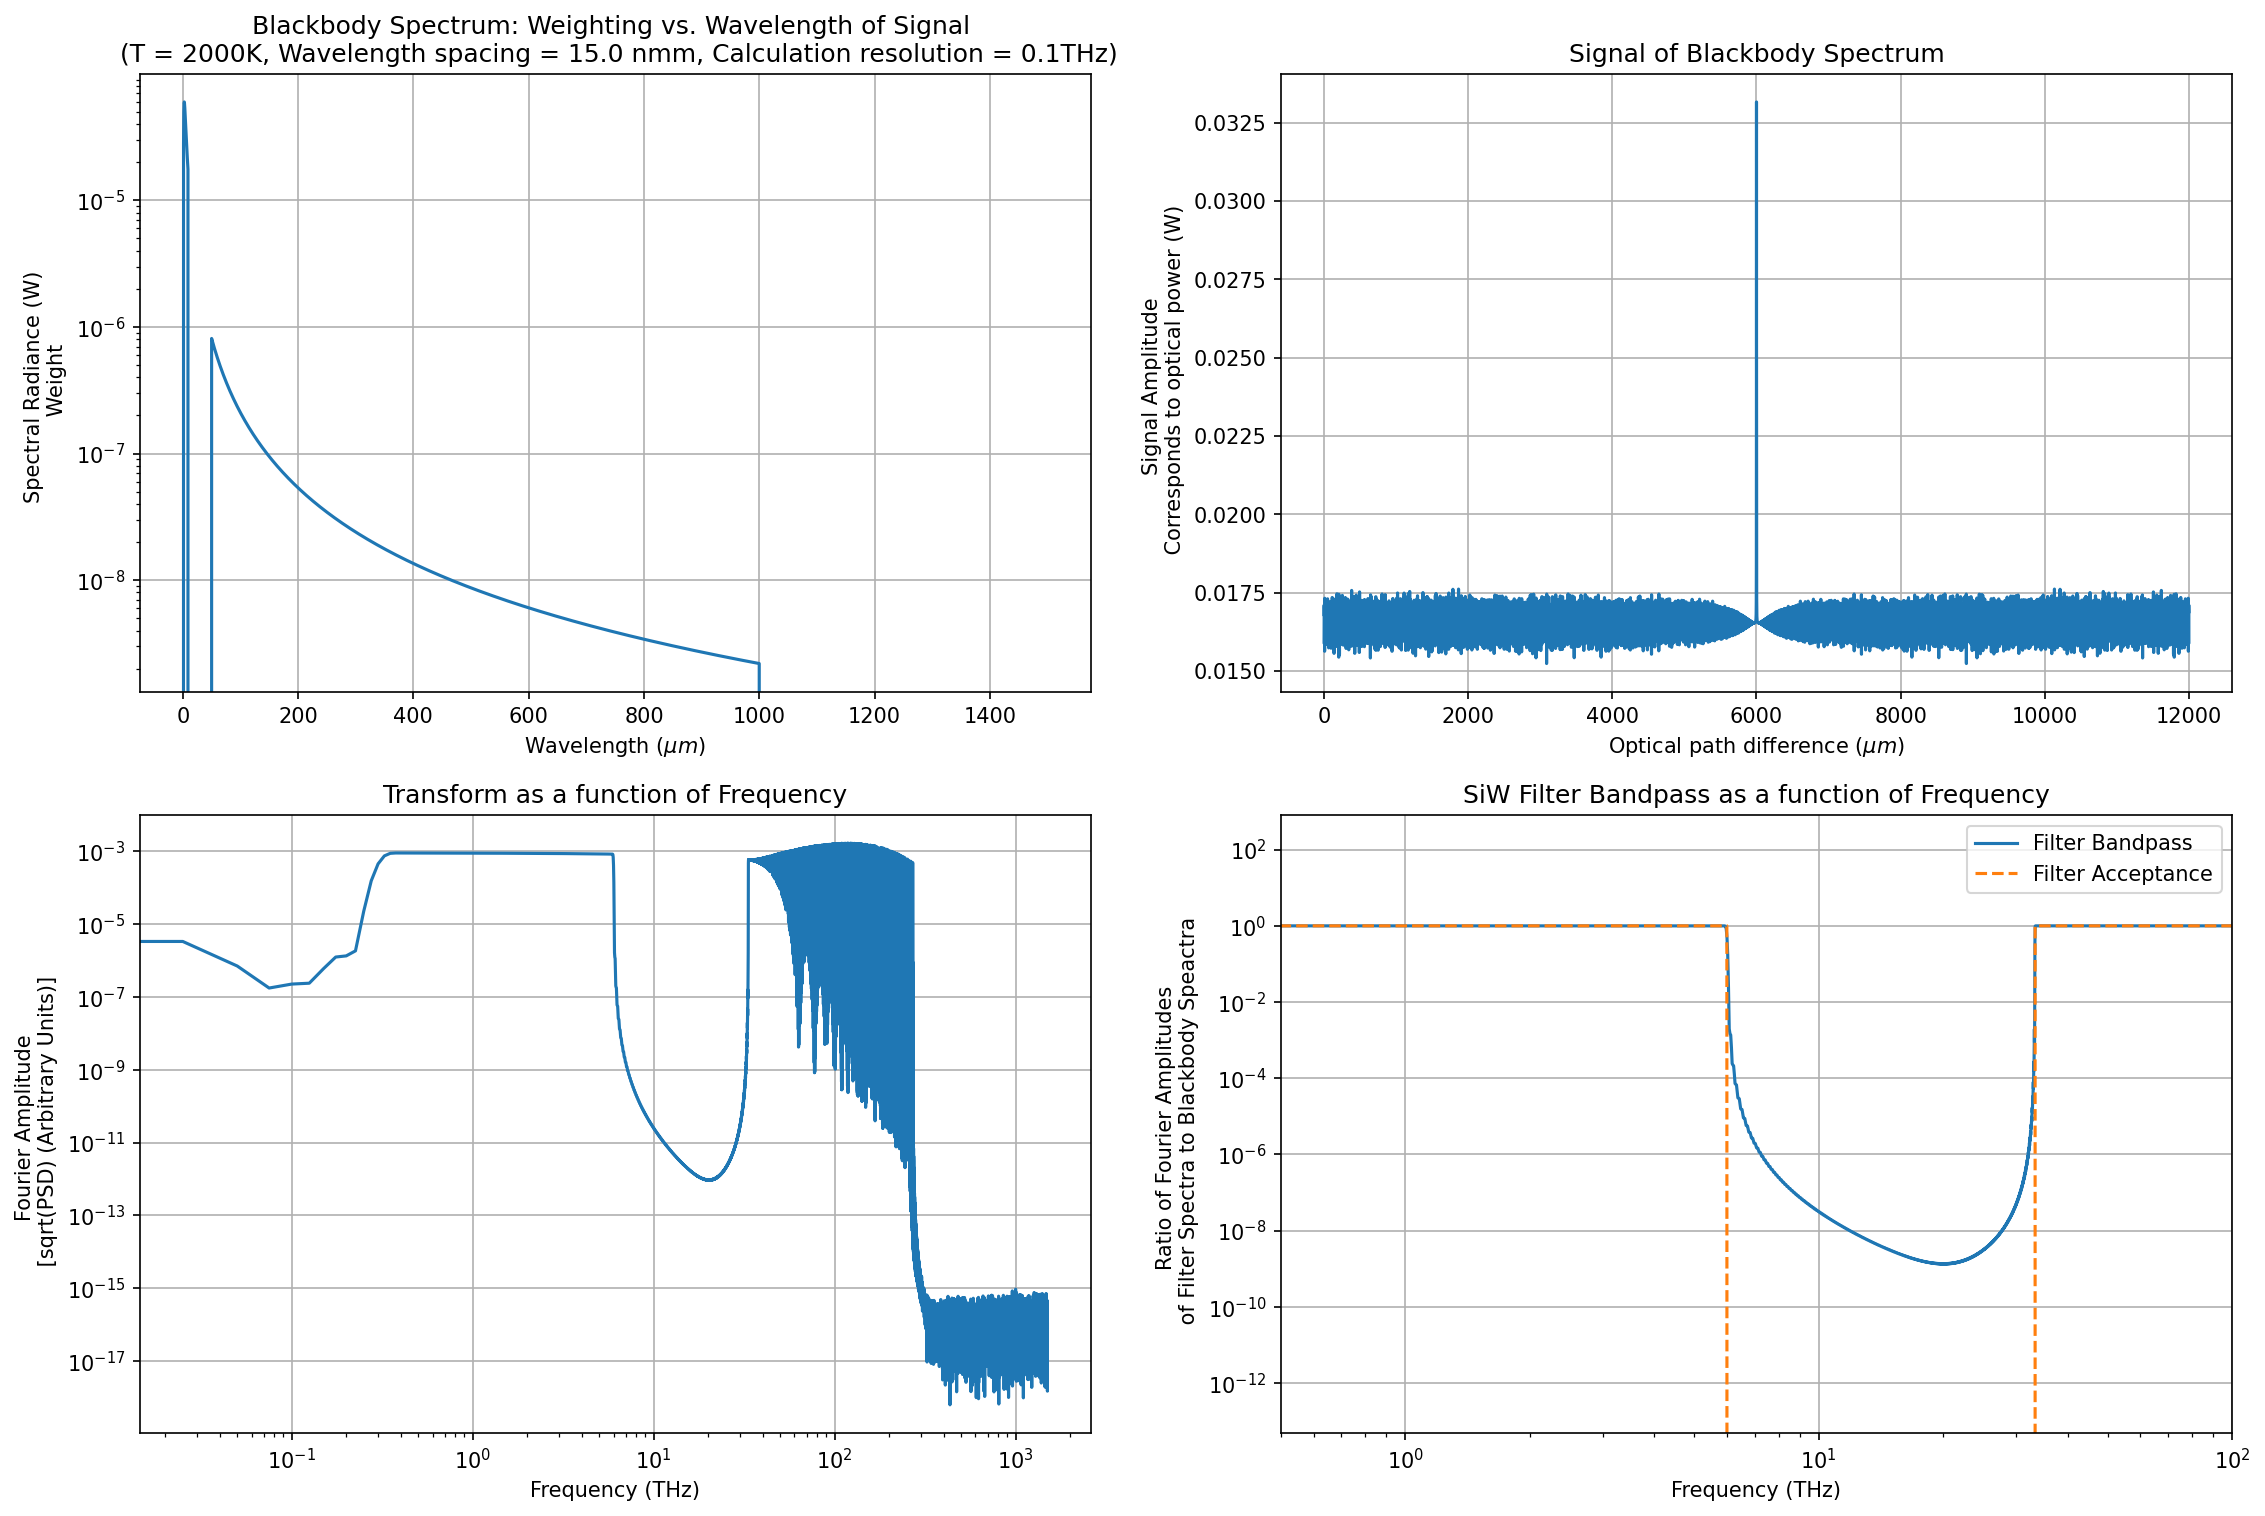

In [0]:
x, y_filter, weights, filter_val = blackbody_input_function(lambda_or_nu, wavelengths, freq_slice_size, filter='SiW', sigma =sigma)

fig = plt.figure(figsize=(18, 12), dpi=150)
plt.subplot(2, 2, 1)
plt.plot(wavelengths, weights)

plt.subplot(2, 2, 2)
plt.plot(x,y)

plt.subplot(2, 2, 3)
frequency, spectrum = psd_frequency(y_filter,'parzen')
plt.semilogy(frequency, spectrum)

spectrum = adjust_spectrum(spectrum, adjustment=0)
spectrum_nofilter = adjust_spectrum(spectrum_nofilter, adjustment=0)

plt.subplot(2, 2, 4)
plt.semilogy(frequency, spectrum/spectrum_nofilter, label = "Filter Bandpass")
plt.semilogy(c_micron_per_second*Hz_to_THz/wavelengths, filter_val, '--', label = 'Filter Acceptance')
print(spectrum)
print(spectrum_nofilter)

#plot details for blackbody spectrum plot
plt.subplot(2, 2, 1)
plt.grid(True)
plt.yscale('log')
title = "Blackbody Spectrum: Weighting vs. Wavelength of Signal \n (T = " + str(Temp) + "K, Wavelength spacing = "+ str(round(wavelength_slice_size*1000,2)) + " nmm, Calculation resolution = " + str(round(freq_slice_size, 2)) + "THz)" 
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(2, 2, 3)
plt.title("Transform as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.xlabel('Frequency (THz)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")

#plot details for transfer function (which is power specctrum in frequency for filter/ blackbody~ like dividing out the noise) 
plt.subplot(2, 2, 4)
plt.title("SiW Filter Bandpass as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlim(5e-1, 100)
plt.xlabel('Frequency (THz)')
plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
plt.show()

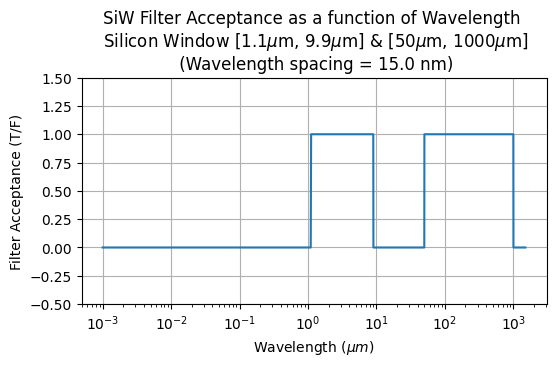

In [0]:
fig = plt.figure(figsize=(6, 3), dpi=100)

plt.plot(wavelengths, filter_val)
plt.xscale('log')
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xscale('log')
title = "SiW Filter Acceptance as a function of Wavelength \n Silicon Window [1.1$\mu$m, 9.9$\mu$m] & [50$\mu$m, 1000$\mu$m] \n (Wavelength spacing = "+ str(round(wavelength_slice_size*1000,2)) + " nm)"
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Filter Acceptance (T/F)")
plt.show()

## Adding the PEW Filter:

Gentec Electro-Optics polyethelene window 10 – 1000μm 

[3.76116706e-06 3.45086000e-06 7.33548733e-07 ... 1.74573391e-17
 1.21040214e-17 6.29743102e-19]
[5.36884141e-06 4.83924670e-06 5.93240449e-07 ... 4.45738403e-16
 5.41616556e-16 3.83962603e-16]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

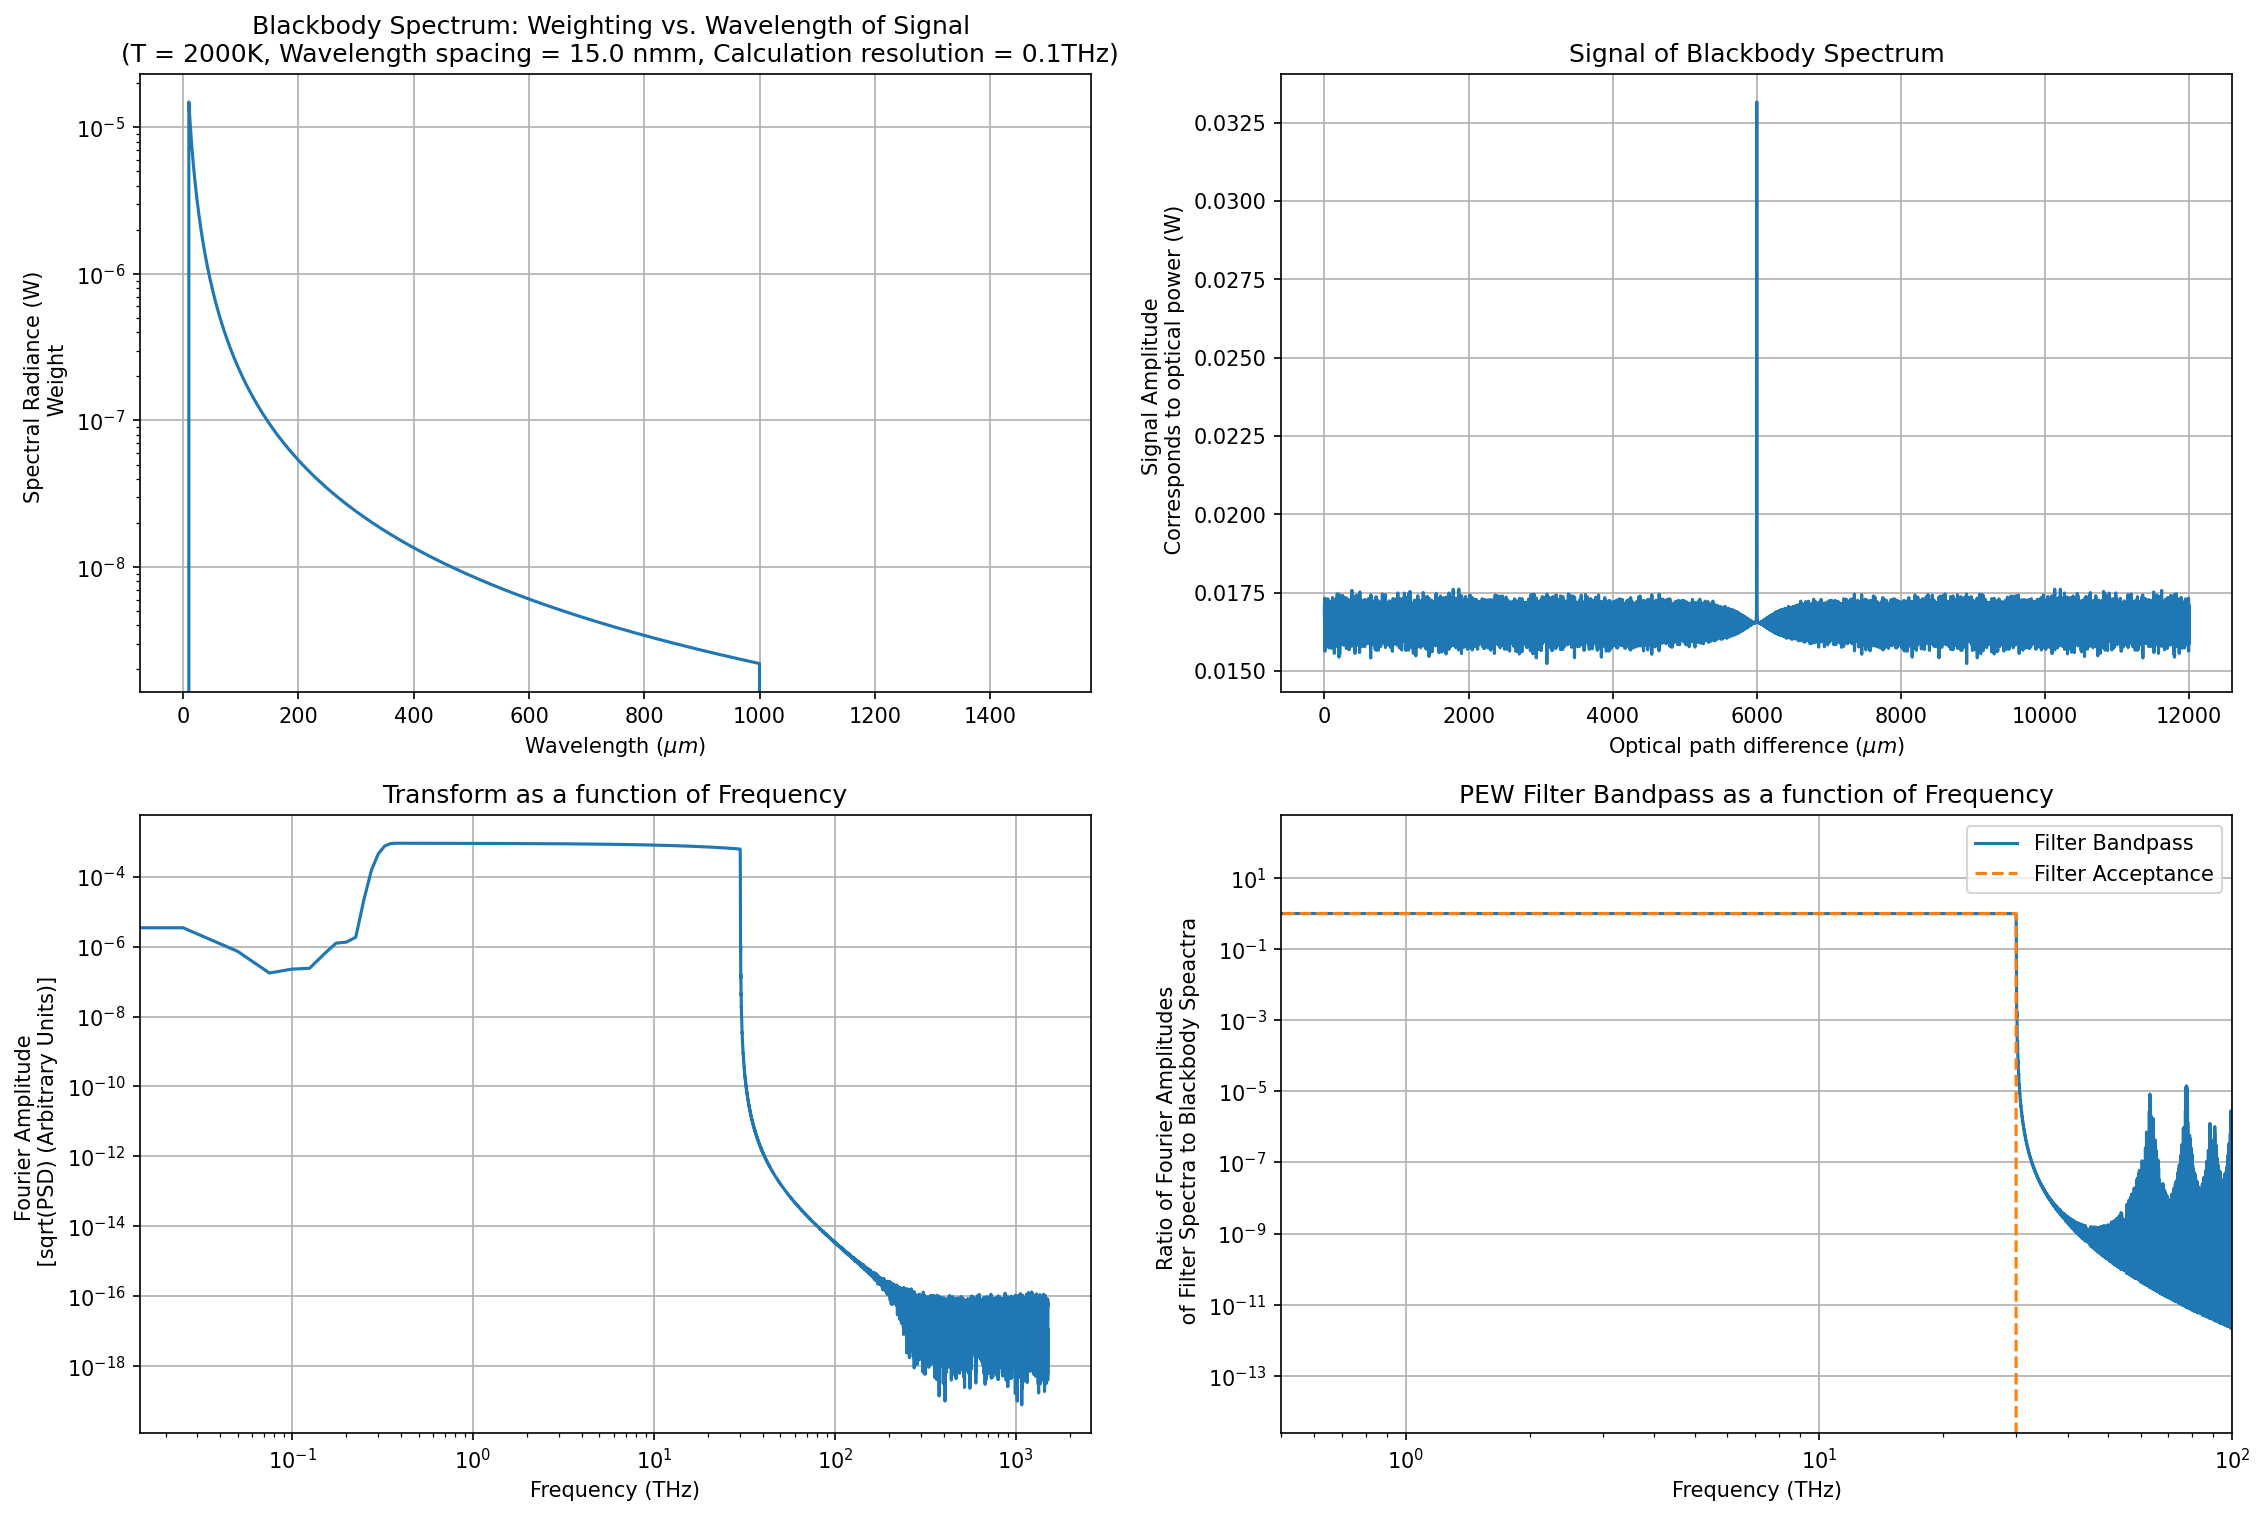

In [0]:
x, y_filter, weights, filter_val = blackbody_input_function(lambda_or_nu, wavelengths, freq_slice_size, filter='PEW', sigma =sigma)

fig = plt.figure(figsize=(18, 12), dpi=150)
plt.subplot(2, 2, 1)
plt.plot(wavelengths, weights)

plt.subplot(2, 2, 2)
plt.plot(x,y)

plt.subplot(2, 2, 3)
frequency, spectrum = psd_frequency(y_filter,'parzen')
plt.semilogy(frequency, spectrum)

spectrum = adjust_spectrum(spectrum, adjustment=0)
spectrum_nofilter = adjust_spectrum(spectrum_nofilter, adjustment=0)

plt.subplot(2, 2, 4)
plt.semilogy(frequency, spectrum/spectrum_nofilter, label = "Filter Bandpass")
plt.semilogy(c_micron_per_second*Hz_to_THz/wavelengths, filter_val, '--', label = 'Filter Acceptance')
print(spectrum)
print(spectrum_nofilter)

#plot details for blackbody spectrum plot
plt.subplot(2, 2, 1)
plt.grid(True)
plt.yscale('log')
title = "Blackbody Spectrum: Weighting vs. Wavelength of Signal \n (T = " + str(Temp) + "K, Wavelength spacing = "+ str(round(wavelength_slice_size*1000,2)) + " nmm, Calculation resolution = " + str(round(freq_slice_size, 2)) + "THz)" 
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(2, 2, 3)
plt.title("Transform as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.xlabel('Frequency (THz)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")

#plot details for transfer function (which is power specctrum in frequency for filter/ blackbody~ like dividing out the noise) 
plt.subplot(2, 2, 4)
plt.title("PEW Filter Bandpass as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlim(5e-1, 100)
plt.xlabel('Frequency (THz)')
plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
plt.show()

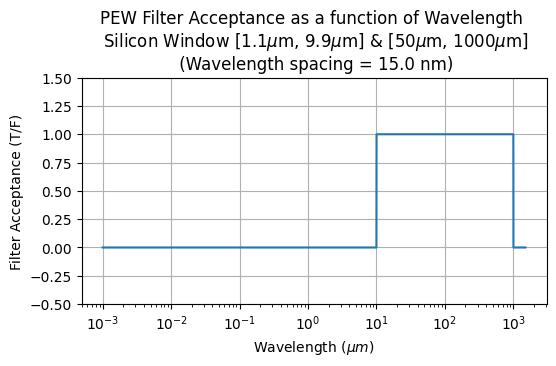

In [0]:
fig = plt.figure(figsize=(6, 3), dpi=100)

plt.plot(wavelengths, filter_val)
plt.xscale('log')
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xscale('log')
title = "PEW Filter Acceptance as a function of Wavelength \n Silicon Window [1.1$\mu$m, 9.9$\mu$m] & [50$\mu$m, 1000$\mu$m] \n (Wavelength spacing = "+ str(round(wavelength_slice_size*1000,2)) + " nm)"
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Filter Acceptance (T/F)")
plt.show()